# Breve Análise Sobre os Dados de Chuva e Casos de Dengue

Autor: Maurício Araujo

github/instagram/twitter: @mauricioarauujo

In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('final.csv', sep = ';')
df.head()

,UF,ANO,MES,CHUVA,DENGUE
0,SP,2015,1,4465.0,772.0
1,SP,2015,2,6595.0,3086.0
2,SP,2015,3,6210.6,8824.0
3,SP,2015,4,1862.0,9932.0
4,SP,2015,5,2756.6,8919.0


In [3]:
df.describe()

,ANO,MES,CHUVA,DENGUE
count,420.0000,420.000000,420.000000,420.000000
mean,2017.0000,6.500000,3151.304762,3375.192857
std,1.4159,3.456169,3072.959202,6351.060184
min,2015.0000,1.000000,11.800000,0.000000
25%,2016.0000,3.750000,815.200000,294.500000
50%,2017.0000,6.500000,2207.300000,1001.500000
75%,2018.0000,9.250000,4616.450000,3415.000000
max,2019.0000,12.000000,19926.000000,56305.000000


In [4]:
df.sort_values(by='CHUVA', ascending=False)  


,UF,ANO,MES,CHUVA,DENGUE
122,MG,2016,1,19926.0,9705.0
274,MG,2018,11,16094.6,111.0
275,MG,2018,12,15762.2,69.0
201,MG,2017,12,14828.4,308.0
84,MG,2016,11,13838.6,101.0
...,...,...,...,...,...
210,CE,2017,9,19.6,1438.0
69,CE,2015,10,19.0,635.0
119,CE,2016,10,18.6,1956.0
120,CE,2016,11,13.4,1551.0


Podemos verificar com notícias que em janeiro de 2016 realmente houve um grande volume de chuva em MG 

## Analisando chuva e casos de dengue ao longo do tempo

In [5]:
#Criando coluna em formato data
df['DATA'] = df.apply(lambda linha: f"{linha['ANO']}-{linha['MES']}-01", axis = 1)
df['DATA'] = pd.to_datetime(df['DATA'])
df.head()

,UF,ANO,MES,CHUVA,DENGUE,DATA
0,SP,2015,1,4465.0,772.0,2015-01-01
1,SP,2015,2,6595.0,3086.0,2015-02-01
2,SP,2015,3,6210.6,8824.0,2015-03-01
3,SP,2015,4,1862.0,9932.0,2015-04-01
4,SP,2015,5,2756.6,8919.0,2015-05-01


In [6]:
df_chuva_dengue_geral = df.groupby('DATA').sum().reset_index()[['DATA','CHUVA','DENGUE']]
df_chuva_dengue_geral.head(10)

,DATA,CHUVA,DENGUE
0,2015-01-01,19381.2,10338.0
1,2015-02-01,26788.4,18149.0
2,2015-03-01,25819.6,56353.0
3,2015-04-01,13926.0,67210.0
4,2015-05-01,15719.4,70047.0
5,2015-06-01,10399.4,29056.0
6,2015-07-01,15101.2,14832.0
7,2015-08-01,5395.8,13408.0
8,2015-09-01,18206.2,7922.0
9,2015-10-01,21088.6,8768.0


<AxesSubplot:>

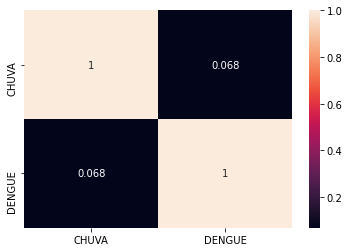

In [7]:
sns.heatmap(df_chuva_dengue_geral.corr(), annot = True) 

Não há correlação de chuva com os casos de dengue analisando o dataset da maneira que está

### Agora vamos observar os casos de dengue em relação a quantidade de chuva de meses anteriores 

In [8]:
df_chuva_dengue_geral['CHUVA_1MES_ANTES'] = df_chuva_dengue_geral['CHUVA'].shift(1)
df_chuva_dengue_geral['CHUVA_2MESES_ANTES'] = df_chuva_dengue_geral['CHUVA'].shift(2)
df_chuva_dengue_geral['CHUVA_3MESES_ANTES'] = df_chuva_dengue_geral['CHUVA'].shift(3)
df_chuva_dengue_geral['CHUVA_4MESES_ANTES'] = df_chuva_dengue_geral['CHUVA'].shift(4)

<AxesSubplot:>

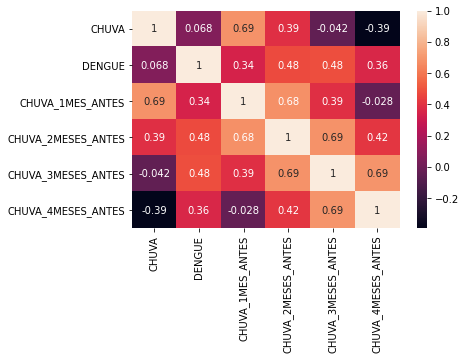

In [9]:
sns.heatmap(df_chuva_dengue_geral.corr(), annot = True) 

Agora podemos ver uma correlação da quantidade de chuvas de meses anteriores com a quantidade de casos de dengue

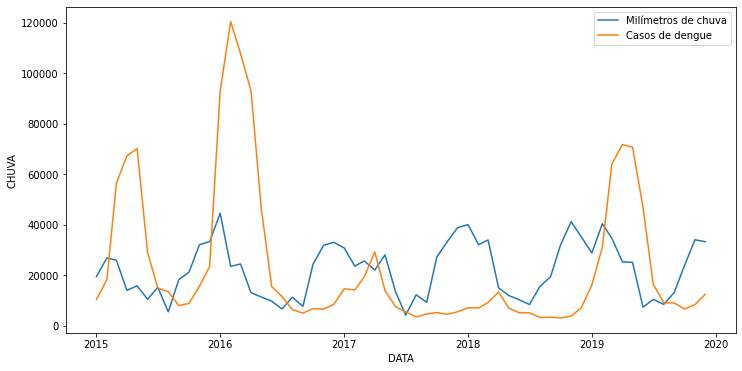

In [10]:
plt.figure(figsize=(12,6))
sns.lineplot(data = df_chuva_dengue_geral, x = 'DATA', y = 'CHUVA')
sns.lineplot(data = df_chuva_dengue_geral, x = 'DATA', y = 'DENGUE' )


plt.legend(['Milímetros de chuva', 'Casos de dengue']) 

Podemos observar com o gráfico acima que geralmente após um acrescimo do volume de chuva há um pico nos casos de dengue.
Tal observação faz total sentido visto que o nascimento de mosquitos da dengue é maior em/após períodos chuvosos.
Observa-se também que ambos possuem uma sazonalidade: períodos chuvosos próximos de finais/começo de ano e maiores casos de dengue em começos de ano onde o calor do verão é mais forte, o que também favorece os mosquitos da dengue. Esta ultima hipótese não exclui a primeira, aliás, pode ser complementar à mesma.

## Analisando a relação no estado do Rio de Janeiro

In [11]:
df_RJ = df[df['UF'] == 'RJ'].groupby('DATA').sum().reset_index()[['DATA','CHUVA','DENGUE']]
df_RJ.head()

,DATA,CHUVA,DENGUE
0,2015-01-01,1200.6,3466.0
1,2015-02-01,1839.4,4616.0
2,2015-03-01,2227.0,13352.0
3,2015-04-01,1477.8,14040.0
4,2015-05-01,956.6,13032.0


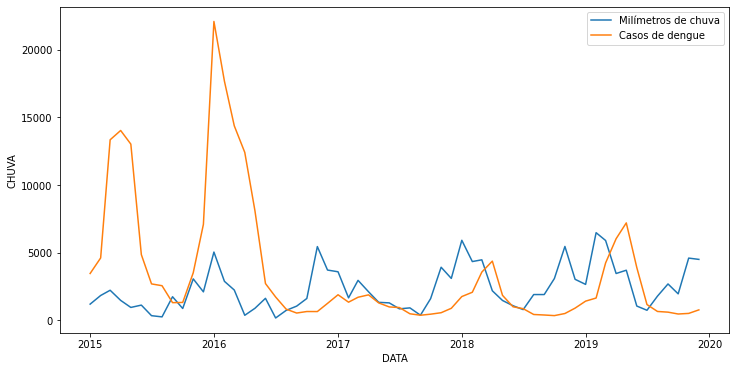

In [12]:
plt.figure(figsize=(12,6))
sns.lineplot(data = df_RJ, x = 'DATA', y = 'CHUVA')
sns.lineplot(data = df_RJ, x = 'DATA', y = 'DENGUE' )


plt.legend(['Milímetros de chuva', 'Casos de dengue']) 

Continua bem evidente as hipóteses levantadas anteriormente.